In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import io

In [58]:
# Read dataset in CSV format from URL using read_csv function from pandas
df = pd.read_csv("https://raw.githubusercontent.com/FajarDwi2103/EyeCare/main/Dataset%20Rabun/Dataset%20Rabun.csv")
df

,Pert.1,Pert.2,Pert.3,Pert.4,Pert.5,Pert.6,Pert.7,Pert.8,Pert.9,Pert.10,Pert.11,Pert.12,Pert.13,Pert.14,Pert.15,HASIL
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.50
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.25
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,-0.75
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32763,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0.25
32764,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0.75
32765,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0.25
32766,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0.50


In [ ]:
# Uses the isnull() method to identify null values in each DataFrame column
# Create variable X which is a new DataFrame, generated from DataFrame df
# by removing the 'RESULTS' column using the drop() method
df.isnull().sum()
X = df.drop(columns = 'HASIL')
X

,Pert.1,Pert.2,Pert.3,Pert.4,Pert.5,Pert.6,Pert.7,Pert.8,Pert.9,Pert.10,Pert.11,Pert.12,Pert.13,Pert.14,Pert.15
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32763,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
32764,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
32765,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
32766,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0


In [ ]:
# Creates the variable y which is a Series, generated from the 'RESULTS' column in the DataFrame df
y = df['HASIL']
df

,Pert.1,Pert.2,Pert.3,Pert.4,Pert.5,Pert.6,Pert.7,Pert.8,Pert.9,Pert.10,Pert.11,Pert.12,Pert.13,Pert.14,Pert.15,HASIL
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.50
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.25
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,-0.75
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32763,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0.25
32764,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0.75
32765,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0.25
32766,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0.50


In [ ]:
# Import the train_test_split function from sklearn.model_selection
# spliting the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [ ]:
# Creating a sequential model using keras
model = keras.Sequential([
      layers.Dense(64, activation='relu',input_shape=(15,)),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

In [ ]:
# Compile a model with a specific configuration using Adam's optimizer
# with learning rate of 0.001 and loss function Mean Absolute Error (MAE)
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mae'
              )

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')

Epoch 1/10
717/717 [==============================] - 3s 3ms/step - loss: 0.0615 - val_loss: 0.0274
Epoch 2/10
717/717 [==============================] - 2s 3ms/step - loss: 0.0200 - val_loss: 0.0164
Epoch 3/10
717/717 [==============================] - 2s 2ms/step - loss: 0.0134 - val_loss: 0.0096
Epoch 4/10
717/717 [==============================] - 2s 2ms/step - loss: 0.0111 - val_loss: 0.0095
Epoch 5/10
717/717 [==============================] - 2s 3ms/step - loss: 0.0096 - val_loss: 0.0065
Epoch 6/10
717/717 [==============================] - 3s 5ms/step - loss: 0.0080 - val_loss: 0.0052
Epoch 7/10
717/717 [==============================] - 2s 2ms/step - loss: 0.0075 - val_loss: 0.0081
Epoch 8/10
717/717 [==============================] - 2s 3ms/step - loss: 0.0065 - val_loss: 0.0078
Epoch 9/10
717/717 [==============================] - 2s 2ms/step - loss: 0.0061 - val_loss: 0.0075
Epoch 10/10
308/308 [==============================] - 0s 2ms/step - loss: 0.0036
Validation Loss: 0

In [59]:
# Create a linear regression model object using LinearRegression() from scikit-learn
# Train linear regression model using training data (X_train, y_train)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Access the intercept (constant) value of a linear regression model
c = lr.intercept_
c

-7.958043946043603e-17

In [ ]:
# Access the coefficient value (slope/gradient) of a linear regression model
m = lr.coef_
m

array([ 5.00000000e-01,  2.50000000e-01,  2.50000000e-01,  2.50000000e-01,
        2.50000000e-01,  2.50000000e-01,  2.50000000e-01, -5.62050406e-16,
       -2.50000000e-01, -2.50000000e-01, -2.50000000e-01, -2.50000000e-01,
       -2.50000000e-01, -2.50000000e-01, -5.00000000e-01])

In [ ]:
# Using linear regression model (lr) to make predictions on training data (X_train)
y_pred_train = lr.predict(X_train)
y_pred_train

array([ 5.00000000e-01, -5.79180801e-16,  7.50000000e-01, ...,
       -7.50000000e-01, -7.50000000e-01, -2.50000000e-01])

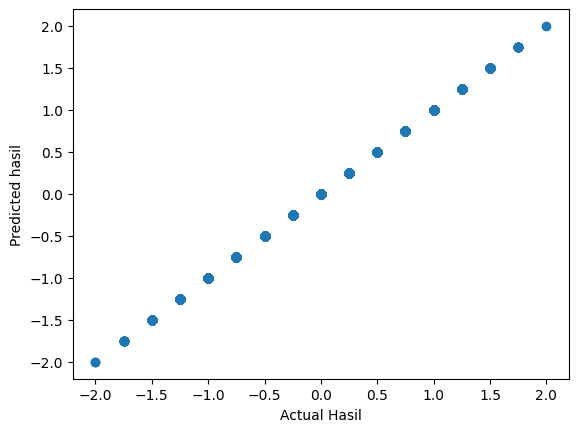

In [ ]:
# Importing matplotlib library for data visualization
# Create a scatter plot to compare the actual (y_train) and predicted (y_pred_train) values.
import matplotlib.pyplot as plt
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Hasil")
plt.ylabel("Predicted hasil")
plt.show()

In [ ]:
# using the r2_score function of scikit-learn to calculate the coefficient of determination (R-squared)
r2_score(y_train, y_pred_train)

1.0

In [57]:
# Using linear regression model (lr) to make predictions on test data (X_test)
y_pred_test = lr.predict(X_test)
y_pred_test

array([ 1.00000000e+00, -5.00000000e-01,  6.97575678e-16, ...,
       -2.50000000e-01,  5.00000000e-01,  1.42464165e-16])

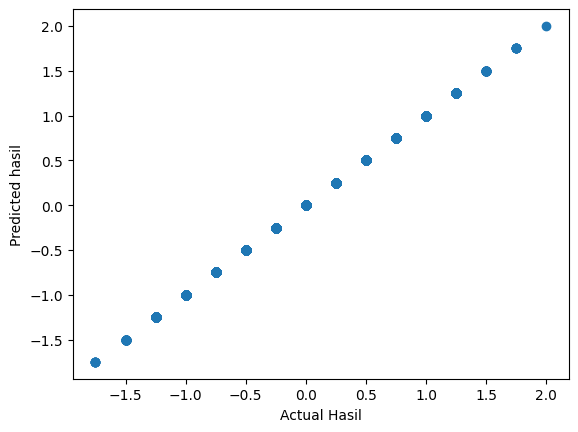

In [ ]:
# Create a scatter plot to compare the actual (y_test) and predicted (y_pred_test) values
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Hasil")
plt.ylabel("Predicted hasil")
plt.show()

In [60]:
# Using the r2_score function of scikit-learn to calculate the coefficient of determination (R-squared)
r2_score(y_test, y_pred_test)

1.0

In [63]:
# Save the model into a file with h5 format
model.save("myopic_model.h5")